In [1]:
from tasks_python_files.Task1_Negation_cue_detection import *
from tasks_python_files.Task2_Rules_based_neg_scope_spacy import *
from tasks_python_files.Task3_NegEx_method import *
from tasks_python_files.SubTask1_From_csv_get_review_text_in_txt_file import write_reviews_text

C:\Users\vanda\anaconda3\envs\p3_6\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [2]:
import spacy
from spacy import displacy


from negspacy.negation import Negex
from negspacy.termsets import termset

import networkx as nx
from textblob import TextBlob

import re
from pathlib import Path

###### Compare negation scope and expected negation scope:

In [3]:
import pandas as pd
from sklearn.metrics import recall_score, precision_score, accuracy_score
df = pd.read_csv("./datasets/synthetic_dataset.csv")

In [4]:
df.tail(6)

,Sentences,ExpectedNegationCues,ExpectedNegationScope
47,"He hadn't done any homework, neither had he br...",neither,had he brought any of his books to class
48,"We didn't get to see the castle, nor did we se...",not,We did get to see the castle nor did we see th...
49,"We didn't get to see the castle, nor did we se...",nor,nor did we see the cathedral
50,There is not a deal good enough that would dra...,not,There is a deal good enough that would drag me...
51,I am disappointed that this is not more toddle...,not,that this is more toddler friendly
52,I am disappointed that this is not more toddle...,disappointed,I am that this is not more toddler friendly


In [5]:
# get neg scope for all sentences in synthetic dataset
neg_scopes_lt = []
neg_cues_lt = []
temp = ""
for j in range(len(df["Sentences"])):
    if df["Sentences"][j] != temp:
        sent = decontract(df["Sentences"][j])
        operating_negs, prefix_negs, suffix_negs, all_negs = identify_all_negs(sent)
        neg_cues_lt.append(all_negs)
        nlp = spacy.load("en_core_web_sm")
        doc = nlp(sent)
        neg_scope_new, pos_lt, ne, scope_idx_l, token_idx_lt = get_neg_scope_pos_ne_rule3_new(doc, all_negs)
        neg_scopes_lt.append(neg_scope_new)
        temp = df["Sentences"][j]


neg_scopes_list = []
for i in range(len(neg_scopes_lt)):
    for j in range(len(neg_scopes_lt[i])):
        neg_scopes_list.append(neg_scopes_lt[i][j])

df = df.assign(Negation_scope = neg_scopes_list)

#ground truth of neg scopes of all sentences in synthetic dataset
expected_neg_scopes_list = list(df["ExpectedNegationScope"])

#scope comparison
predicted_list = []
expected_list = []
for i in range(len(expected_neg_scopes_list)):
    if neg_scopes_list[i]==expected_neg_scopes_list[i]:
        predicted_list.append(1)
    else:
        predicted_list.append(0)
    expected_list.append(1)

In [6]:
df.tail(3)

,Sentences,ExpectedNegationCues,ExpectedNegationScope,Negation_scope
50,There is not a deal good enough that would dra...,not,There is a deal good enough that would drag me...,There is a deal good enough that would drag me...
51,I am disappointed that this is not more toddle...,not,that this is more toddler friendly,that this is more toddler friendly
52,I am disappointed that this is not more toddle...,disappointed,I am that this is not more toddler friendly,I am that this is not more toddler friendly


In [7]:
df.to_csv("./datasets/Synthetic_dataset_output.csv")

In [8]:
n_l = [neg_cues_lt[i] for i in range(len(neg_cues_lt))]
predicted_list.count(0)

21

In [9]:
#precision_score(y_true, y_pred, average='macro')
#micro: Calculates metrics globally by counting the total true positives, false negatives and false positives.

#precision_score(expected_neg_scopes_list, neg_scopes_list, average='micro')
#print(precision_score(expected_list, predicted_list, average='micro'))

print(accuracy_score(expected_list, predicted_list))
#recall_score(expected_list, predicted_list, average='micro')

0.6037735849056604


if neg_scopes_list[i]<=expected_neg_scopes_list[i]:
        predicted_list.append(1)
if we consider this condition then accuracy is 72 percent

#The precision is the ratio tp / (tp + fp)
#The recall is the ratio tp / (tp + fn) 

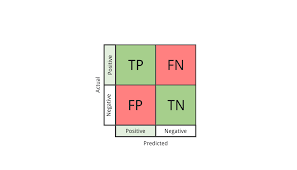

In [10]:
# converting 'Sentences' column into list
a = list(df['Sentences'])

write_reviews_text(a,"synthetic_dataset_txt_file.txt")